In [1]:
# https://datahack.analyticsvidhya.com/contest/black-friday/
import pandas as pd
import numpy as np
train = pd.read_csv('C:/Trang/Python/dataset/black_friday/train.csv')
test = pd.read_csv('C:/Trang/Python/dataset/black_friday/test.csv')

In [2]:
# check data type
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Continuous variable debsciption
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


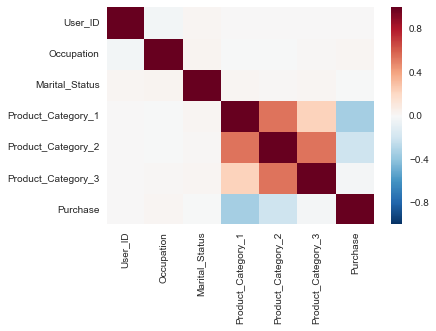

In [5]:
import seaborn as sns
%matplotlib inline
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

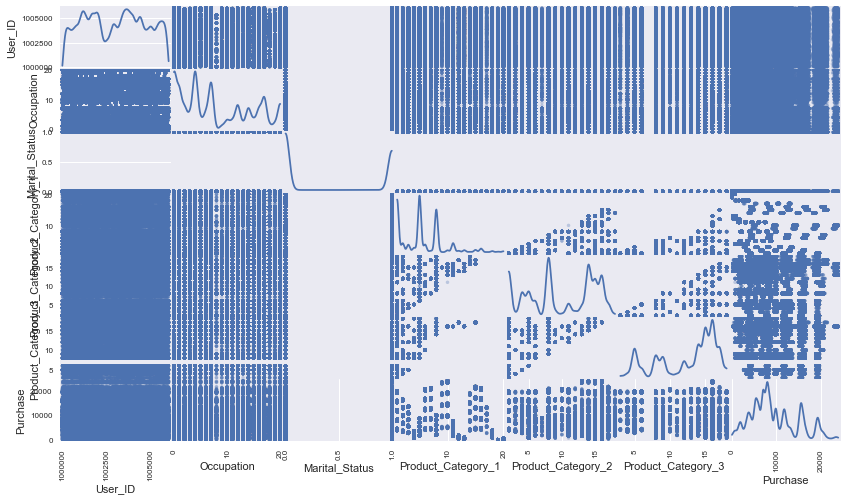

In [6]:
pd.plotting.scatter_matrix(train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [5]:
train['Occupation'][train['Occupation'].notnull()]=train['Occupation'][train['Occupation'].notnull()].astype(str)
train['Marital_Status'][train['Marital_Status'].notnull()]=train['Marital_Status'][train['Marital_Status'].notnull()].astype(str)
train['Product_Category_1'][train['Product_Category_1'].notnull()]=train['Product_Category_1'][train['Product_Category_1'].notnull()].astype(str)
train['Product_Category_2'][train['Product_Category_2'].notnull()]=train['Product_Category_2'][train['Product_Category_2'].notnull()].astype(str)
train['Product_Category_3'][train['Product_Category_3'].notnull()]=train['Product_Category_3'][train['Product_Category_3'].notnull()].astype(str)
test['Occupation'][test['Occupation'].notnull()]=test['Occupation'][test['Occupation'].notnull()].astype(str)
test['Marital_Status'][test['Marital_Status'].notnull()]=test['Marital_Status'][test['Marital_Status'].notnull()].astype(str)
test['Product_Category_1'][test['Product_Category_1'].notnull()]=test['Product_Category_1'][test['Product_Category_1'].notnull()].astype(str)
test['Product_Category_2'][test['Product_Category_2'].notnull()]=test['Product_Category_2'][test['Product_Category_2'].notnull()].astype(str)
test['Product_Category_3'][test['Product_Category_3'].notnull()]=test['Product_Category_3'][test['Product_Category_3'].notnull()].astype(str)

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [6]:
train.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [7]:
# Categorical Variable Description
# Step 1 : get list categorical variables
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print categorical_variables

Index([u'Product_ID', u'Gender', u'Age', u'Occupation', u'City_Category',
       u'Stay_In_Current_City_Years', u'Marital_Status', u'Product_Category_1',
       u'Product_Category_2', u'Product_Category_3'],
      dtype='object')


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null object
Product_Category_1            550068 non-null object
Product_Category_2            376430 non-null object
Product_Category_3            166821 non-null object
Purchase                      550068 non-null int64
dtypes: int64(2), object(10)
memory usage: 50.4+ MB


In [9]:
# use apply function to get the number of unique values for each categorical variables
train[categorical_variables].apply(lambda x: len(x.unique()))

Product_ID                    3631
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              20
Product_Category_2              18
Product_Category_3              16
dtype: int64

In [10]:
# print count of category
#train['categorical_variables'].apply(lambda x: x.value_counts())
pd.concat([ train['Product_ID'].value_counts() ,100*train['Product_ID'].rename('Percent').value_counts()/train.shape[0]], axis = 1)

,Product_ID,Percent
P00265242,1880,0.341776
P00025442,1615,0.293600
P00110742,1612,0.293055
P00112142,1562,0.283965
P00057642,1470,0.267240
P00184942,1440,0.261786
P00046742,1438,0.261422
P00058042,1422,0.258513
P00145042,1406,0.255605
P00059442,1406,0.255605


In [11]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['Product_ID_frequency_distribution'] = number.fit_transform(train['Product_ID'].astype('str'))

In [12]:
test['Product_ID_frequency_distribution'] = number.fit_transform(test['Product_ID'].astype('str'))

In [9]:
# generate response rate based on purchase amount
t_Product_ID_grouped = train['Purchase'].groupby(train['Product_ID']).mean()
train['Product_ID_response_rate']=train.merge(pd.DataFrame(t_Product_ID_grouped),how='left',left_on='Product_ID',right_index=True)['Purchase_y']

In [45]:
test['Product_ID_response_rate']=train.merge(pd.DataFrame(t_Product_ID_grouped),how='left',left_on='Product_ID',right_index=True)['Purchase_y']

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                              233599 non-null int64
Product_ID                           233599 non-null object
Gender                               233599 non-null object
Age                                  233599 non-null object
Occupation                           233599 non-null object
City_Category                        233599 non-null object
Stay_In_Current_City_Years           233599 non-null object
Marital_Status                       233599 non-null object
Product_Category_1                   233599 non-null object
Product_Category_2                   161255 non-null object
Product_Category_3                   71037 non-null object
Product_ID_frequency_distribution    233599 non-null int64
dtypes: int64(2), object(10)
memory usage: 21.4+ MB


In [14]:
pd.concat([train['Gender'].value_counts(dropna=False),100*train['Gender'].rename('Percent').value_counts(dropna=False)/train.shape[0] ],axis = 1)

,Gender,Percent
M,414259,75.310507
F,135809,24.689493


In [15]:
# convert F -> 0 , M -> 1
train['Gender']=train['Gender'].apply(lambda x: 0 if x=='M' else 1)
test['Gender']=test['Gender'].apply(lambda x: 0 if x=='M' else 1)

In [16]:
pd.concat([train['Age'].value_counts(),100*train['Age'].value_counts()/train.shape[0] ],axis = 1)

,Age,Age
26-35,219587,39.919974
36-45,110013,19.999891
18-25,99660,18.117760
46-50,45701,8.308246
51-55,38501,6.999316
55+,21504,3.909335
0-17,15102,2.745479


In [17]:
# categorical variable: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/ 
train['Age'] = train['Age'].map({'26-35':30, '36-45':40,'18-25':22,'46-50':49,'51-55':53,'55+':60,'0-17':9})
test['Age'] = test['Age'].map({'26-35':30, '36-45':40,'18-25':22,'46-50':49,'51-55':53,'55+':60,'0-17':9})

In [18]:
pd.concat([train['Age'].value_counts(),100*train['Age'].value_counts()/train.shape[0] ],axis = 1)

,Age,Age
30,219587,39.919974
40,110013,19.999891
22,99660,18.117760
49,45701,8.308246
53,38501,6.999316
60,21504,3.909335
9,15102,2.745479


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                              550068 non-null int64
Product_ID                           550068 non-null object
Gender                               550068 non-null int64
Age                                  550068 non-null int64
Occupation                           550068 non-null object
City_Category                        550068 non-null object
Stay_In_Current_City_Years           550068 non-null object
Marital_Status                       550068 non-null object
Product_Category_1                   550068 non-null object
Product_Category_2                   376430 non-null object
Product_Category_3                   166821 non-null object
Purchase                             550068 non-null int64
Product_ID_frequency_distribution    550068 non-null int64
dtypes: int64(5), object(8)
memory usage: 54.6+ MB


In [20]:
pd.concat([train['Occupation'].value_counts(),100*train['Occupation'].value_counts()/train.shape[0] ],axis = 1)                           

,Occupation,Occupation
4,72308,13.145284
0,69638,12.659889
7,59133,10.750125
1,47426,8.621843
17,40043,7.279645
20,33562,6.101427
12,31179,5.668208
14,27309,4.964659
2,26588,4.833584
16,25371,4.612339


In [21]:
# Run a loop and replace all values with others
categories_to_combine = ['15','11','19','13','18','9','8','14','2','16','6','3','10','5']
for cat in categories_to_combine:
    train['Occupation']=train['Occupation'].replace(cat,'Others')
    test['Occupation']=test['Occupation'].replace(cat,'Others')

In [22]:
pd.concat([train['Occupation'].value_counts(),100*train['Occupation'].value_counts()/train.shape[0] ],axis = 1)

,Occupation,Occupation
Others,196779,35.773577
4,72308,13.145284
0,69638,12.659889
7,59133,10.750125
1,47426,8.621843
17,40043,7.279645
20,33562,6.101427
12,31179,5.668208


In [23]:
pd.concat([train['City_Category'].value_counts(),train['City_Category'].value_counts()/train.shape[0] ],axis = 1)        

,City_Category,City_Category
B,231173,0.420263
C,171175,0.311189
A,147720,0.268549


In [24]:
pd.concat([train['Stay_In_Current_City_Years'].value_counts(),100*train['Stay_In_Current_City_Years'].value_counts()/train.shape[0] ],axis = 1)        

,Stay_In_Current_City_Years,Stay_In_Current_City_Years
1,193821,35.235825
2,101838,18.513711
3,95285,17.322404
4+,84726,15.402823
0,74398,13.525237


In [25]:
clean_ups = {"Stay_In_Current_City_Years":{"1":1,"2":2,"3":3,"4+":4,"0":0}}
train.replace(clean_ups,inplace=True)
test.replace(clean_ups,inplace=True)

In [26]:
pd.concat([train['Product_Category_1'].value_counts(dropna=False),100*train['Product_Category_1'].value_counts(dropna=False)/train.shape[0] ],axis = 1)

,Product_Category_1,Product_Category_1
5,150933,27.438971
1,140378,25.520118
8,113925,20.711076
11,24287,4.415272
2,23864,4.338373
6,20466,3.720631
3,20213,3.674637
4,11753,2.136645
16,9828,1.786688
15,6290,1.143495


In [27]:
frq = train['Product_Category_1'].value_counts()/train.shape[0]
categories_to_combine= frq.loc[frq<0.05].index
for cat in categories_to_combine:
    train['Product_Category_1'].replace({cat:"Others"},inplace=True)
    test['Product_Category_1'].replace({cat:"Others"},inplace=True)

In [48]:
pd.concat([train['Product_Category_2'].value_counts(dropna=False),train['Product_Category_2'].value_counts(dropna=False)/train.shape[0] ],axis = 1)        

,Product_Category_2,Product_Category_2
NaN,173638,0.315666
others,126907,0.230711
8.0,64088,0.116509
14.0,55108,0.100184
2.0,49217,0.089474
16.0,43255,0.078636
15.0,37855,0.068819


In [29]:
frq = train['Product_Category_2'].value_counts(dropna=False)/train.shape[0]
categories_to_combine = frq.loc[frq<0.05].index
for cat in categories_to_combine:
    train['Product_Category_2'].replace(cat,'others',inplace=True)
    test['Product_Category_2'].replace(cat,'others',inplace=True)

In [86]:
table=train.pivot_table(index=['Product_Category_1','Product_Category_2'], aggfunc='count')

In [81]:
train.shape

(550068, 14)

In [82]:
test.shape

(233599, 13)

In [83]:
test.iloc[0:10,:]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_frequency_distribution,Product_ID_response_rate
0,1000004,P00128942,0,49,7,B,2,1,1,others,NaN,1144,11870.863436
1,1000009,P00113442,0,30,17,C,0,0,Others,others,NaN,994,16304.030981
2,1000010,P00288442,1,40,1,B,4,1,5,14.0,NaN,2672,1237.892157
3,1000010,P00145342,1,40,1,B,4,1,Others,others,NaN,1299,1455.140762
4,1000011,P00053842,1,30,1,C,1,0,Others,others,12.0,519,7692.763547
5,1000013,P00350442,0,49,1,C,3,1,Others,others,15.0,3240,14318.772358
6,1000013,P00155442,0,49,1,C,3,1,1,others,15.0,1399,16899.227083
7,1000013,P0094542,0,49,1,C,3,1,Others,others,9.0,3437,14169.618887
8,1000015,P00161842,0,30,7,A,1,0,Others,others,16.0,1458,15947.346491
9,1000022,P00067942,0,22,Others,A,4,0,5,14.0,NaN,638,8068.920555


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                              550068 non-null int64
Product_ID                           550068 non-null object
Gender                               550068 non-null int64
Age                                  550068 non-null int64
Occupation                           550068 non-null object
City_Category                        550068 non-null object
Stay_In_Current_City_Years           550068 non-null int64
Marital_Status                       550068 non-null object
Product_Category_1                   550068 non-null object
Product_Category_2                   376430 non-null object
Product_Category_3                   166821 non-null object
Purchase                             550068 non-null int64
Product_ID_frequency_distribution    550068 non-null int64
dtypes: int64(6), object(7)
memory usage: 54.6+ MB


In [169]:
def get_combined_data():
    combined = train.iloc[:,:-1]
    combined=combined.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined

In [170]:
combined = get_combined_data()

In [175]:
def process_category2():
    global combined
    
    # a function that fills the missing values of Product Category 2 variable
    def fillCategory2(row,category2_table):
        
        #if row['Product_Category_1'] == 1:
        #    return table.loc[1][table.loc[1]['Product_ID']==table['Product_ID'].loc[1].max()].index.values[0]
        
        cat1 = row['Product_Category_1']
        return category2_table.loc[cat1][category2_table.loc[cat1]['Product_ID']==category2_table['Product_ID'].loc[cat1].max()].index.values[0]
    combined.Product_Category_2 = combined.apply(lambda r: fillCategory2(r,table) if (r['Product_Category_2']==np.nan) else r['Product_Category_2'],axis =1)

In [176]:
#process_category2()

In [177]:
#combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null object
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null int64
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null object
Product_Category_2            537685 non-null object
Product_Category_3            237858 non-null object
dtypes: int64(5), object(6)
memory usage: 65.8+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['User_ID_frequency_distribution'] = number.fit_transform(train['User_ID'].astype('str'))
test['User_ID_frequency_distribution'] = number.fit_transform(test['User_ID'].astype('str'))

In [49]:
train_final = pd.get_dummies(train,columns=['Occupation', 'City_Category','Product_Category_1','Product_Category_2'], prefix=['Occupation', 'City_Category','Product_Category_1','Product_Category_2'])
test_final = pd.get_dummies(test,columns=['Occupation', 'City_Category','Product_Category_1','Product_Category_2'], prefix=['Occupation', 'City_Category','Product_Category_1','Product_Category_2'])
#train_final = pd.get_dummies(combined.iloc[:550068,:],columns=['Occupation', 'City_Category','','Product_Category_1'], prefix=['Occupation', 'City_Category','Product_Category_1'])
#test_final = pd.get_dummies(combined.iloc[550068:,:],columns=['Occupation', 'City_Category','Product_Category_1'], prefix=['Occupation', 'City_Category','Product_Category_1'])

In [34]:
pd.concat([train['Product_Category_3'].value_counts(dropna=False),train['Product_Category_3'].value_counts(dropna=False)/train.shape[0] ],axis = 1)  

,Product_Category_3,Product_Category_3
NaN,383247,0.696727
16.0,32636,0.059331
15.0,28013,0.050926
14.0,18428,0.033501
17.0,16702,0.030364
5.0,16658,0.030284
8.0,12562,0.022837
9.0,11579,0.021050
12.0,9246,0.016809
13.0,5459,0.009924


In [50]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 31 columns):
User_ID                              550068 non-null int64
Product_ID                           550068 non-null object
Gender                               550068 non-null int64
Age                                  550068 non-null int64
Stay_In_Current_City_Years           550068 non-null int64
Marital_Status                       550068 non-null object
Product_Category_3                   166821 non-null object
Purchase                             550068 non-null int64
Product_ID_frequency_distribution    550068 non-null int64
User_ID_frequency_distribution       550068 non-null int64
Occupation_0                         550068 non-null uint8
Occupation_1                         550068 non-null uint8
Occupation_12                        550068 non-null uint8
Occupation_17                        550068 non-null uint8
Occupation_20                        550068 non-null uint8
O

In [57]:
#X_train= train_final.loc[:,['Product_ID_frequency_distribution','Product_ID_response_rate','Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others']]
#X_train= train_final.loc[:,['Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others','Product_Category_2_14.0','Product_Category_2_15.0','Product_Category_2_16.0','Product_Category_2_2.0','Product_Category_2_8.0','Product_Category_2_others']]
X_train= train_final.loc[:,['User_ID_frequency_distribution','Product_ID_frequency_distribution','Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others','Product_Category_2_14.0','Product_Category_2_15.0','Product_Category_2_16.0','Product_Category_2_2.0','Product_Category_2_8.0','Product_Category_2_others']]
Y_train = train.loc[:,['Purchase']]

In [58]:
#X_test= test_final.loc[:,['Product_ID_frequency_distribution','Product_ID_response_rate','Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others']]
#X_test= test_final.loc[:,['Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others','Product_Category_2_14.0','Product_Category_2_15.0','Product_Category_2_16.0','Product_Category_2_2.0','Product_Category_2_8.0','Product_Category_2_others']]
X_test= test_final.loc[:,['User_ID_frequency_distribution','Product_ID_frequency_distribution','Gender','Age','Stay_In_Current_City_Years','Marital_Status','Occupation_0','Occupation_1','Occupation_12','Occupation_17','Occupation_20','Occupation_4','Occupation_7','Occupation_Others','City_Category_A','City_Category_B','City_Category_C','Product_Category_1_1','Product_Category_1_5','Product_Category_1_8','Product_Category_1_Others','Product_Category_2_14.0','Product_Category_2_15.0','Product_Category_2_16.0','Product_Category_2_2.0','Product_Category_2_8.0','Product_Category_2_others']]

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 27 columns):
User_ID_frequency_distribution       550068 non-null int64
Product_ID_frequency_distribution    550068 non-null int64
Gender                               550068 non-null int64
Age                                  550068 non-null int64
Stay_In_Current_City_Years           550068 non-null int64
Marital_Status                       550068 non-null object
Occupation_0                         550068 non-null uint8
Occupation_1                         550068 non-null uint8
Occupation_12                        550068 non-null uint8
Occupation_17                        550068 non-null uint8
Occupation_20                        550068 non-null uint8
Occupation_4                         550068 non-null uint8
Occupation_7                         550068 non-null uint8
Occupation_Others                    550068 non-null uint8
City_Category_A                      550068 non-null uint8
Cit

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 27 columns):
User_ID_frequency_distribution       233599 non-null int64
Product_ID_frequency_distribution    233599 non-null int64
Gender                               233599 non-null int64
Age                                  233599 non-null int64
Stay_In_Current_City_Years           233599 non-null int64
Marital_Status                       233599 non-null int32
Occupation_0                         233599 non-null uint8
Occupation_1                         233599 non-null uint8
Occupation_12                        233599 non-null uint8
Occupation_17                        233599 non-null uint8
Occupation_20                        233599 non-null uint8
Occupation_4                         233599 non-null uint8
Occupation_7                         233599 non-null uint8
Occupation_Others                    233599 non-null uint8
City_Category_A                      233599 non-null uint8
City

In [60]:
X_test.Marital_Status=X_test.Marital_Status.astype('int')
X_train.Marital_Status=X_train.Marital_Status.astype('int')

In [61]:
# Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
Y_pred = model.predict(X_train)

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
print 'Coeffecients : \n' , model.coef_
print 'Mean squared error : %.2f' %mean_squared_error(Y_train,Y_pred)
print 'Variance score: %.2f' %r2_score(Y_train,Y_pred)

Coeffecients : 
[[  3.99341229e-03  -4.29540329e-01  -4.82095887e+01   1.24836658e+01
    4.29901166e+00  -4.28738279e+01  -1.42832376e+02  -1.24029103e+02
    2.53921848e+02   5.64839833e+01  -9.14412831e+01   2.94983860e+01
    1.30370961e+01   5.36144917e+00  -2.00089021e+02  -9.41378676e+01
    2.94226888e+02   4.26195075e+03  -3.03387704e+03  -1.53951664e+03
    3.11442934e+02  -4.61747288e+02  -2.06425795e+02   5.20540733e+01
    1.41832425e+02   1.68243156e+03   2.86737516e+02]]
Mean squared error : 16689803.77
Variance score: 0.34


In [63]:
predictions = model.predict(X_test)

In [44]:
# The coefficients
print('Coefficients: \n', model.coef_)

('Coefficients: \n', array([[  5.34275111e-03,  -4.04806947e-01,  -5.33136694e+01,
          1.33078418e+01,   3.89731081e+00,  -4.19950735e+01,
         -1.44378670e+02,  -1.12106733e+02,   2.35623385e+02,
          4.20629496e+01,  -7.54649967e+01,   2.98102587e+01,
          1.86782402e+01,   5.77556623e+00,  -1.98778247e+02,
         -9.50219446e+01,   2.93800192e+02,   4.32320009e+03,
         -2.92863741e+03,  -1.78513643e+03,   3.90573760e+02]]))


In [45]:
print('Coefficients: \n', model.coef_)

('Coefficients: \n', array([[ -2.08280809e-03,   9.99193726e-01,   1.63781816e+01,
          2.12892237e+00,   1.29962355e+01,  -5.10070744e+01,
          4.09424351e-01,  -1.86731595e+02,   1.10062645e+02,
          1.33330980e+02,  -1.98949268e+02,   6.04597353e+01,
          2.09859654e+01,   6.04321119e+01,  -1.51770003e+02,
         -3.29301630e+01,   1.84700166e+02,  -1.05427661e+01,
          4.46443779e+00,   7.04693761e+00,  -9.68609297e-01]]))


In [64]:
result=pd.merge(test, pd.DataFrame(predictions,columns=['Purchase']), left_index=True, right_index=True)

In [65]:
result.loc[:,['User_ID','Product_ID','Purchase']].to_csv("C:/Trang/Python/dataset/black_friday/result2.csv")